# Load libraries

In [1]:
import pandas as pd
import numpy as np
import pandas_profiling
from sklearn.decomposition import PCA,TruncatedSVD
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
plt.style.use('ggplot')

%matplotlib inline

In [3]:
import os
os.chdir('/home/tapas/')

In [4]:
df = pd.read_csv('cs-trainig-missing-filled.csv')

In [6]:
df.rename(columns={df.columns[0]:'id'}, inplace=True)

In [7]:
df.head(5)

,id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime3059DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime6089DaysPastDueNotWorse,NumberOfDependents
0,0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [7]:
pandas_profiling.ProfileReport(df)

Number of variables,12
Number of observations,150000
Total Missing (%),0.0%
Total size in memory,13.7 MiB
Average record size in memory,96.0 B
Numeric,10
Categorical,0
Date,0
Text (Unique),0
Rejected,2
Distinct count,114194


In [13]:
df.groupby("SeriousDlqin2yrs").count()[['id']]/len(df)

,id
SeriousDlqin2yrs,
0,0.93316
1,0.06684


In [ ]:
import pandas.tools.plotting as pdplt
import matplotlib.pyplot as plt

In [ ]:
andrews_curves(df, 'SeriousDlqin2yrs')
plt.show()

In [ ]:
# 15.5 Draw parallel coordinates titanic dataset
#parallel_coordinates(df1, "a")
parallel_coordinates(df, "SeriousDlqin2yrs")

In [ ]:
# 15.6. A final multivariate visualization technique pandas
#     has is radviz.
#     In Radviz, each dimension in the dataset is represented by
#      a dimensional anchor, and each dimensional anchor is distributed
#       evenly on a unit circle. Each line in the data set corresponds
#       to a point in the projection, that is linked to every dimensional
#        anchor by a spring. Each spring’s stiffness corresponds to the
#        value for that particular thing in that particular dimension.
#         The position of the point is defined as the point in the 2D space
#          where the spring’s tension is minimum.
radviz(df, "SeriousDlqin2yrs")

In [ ]:
# 17. Manifold Learnings
tsne= TSNE()
# 17.2 Next, t-sne of titanic data
tsne_results = tsne.fit_transform(df.iloc[:, 1:], df.iloc[:, 0])

# 18. Plot the two results
df1_tsne = df1.iloc[:, 1:].copy()
# 18.1
df1_tsne['x-tsne'] = tsne_results1[:,0]
# 18.2
df1_tsne['y-tsne'] = tsne_results1[:,1]

In [ ]:
# 18.3
#  List comprehensions provide a concise way to create lists. 
#   Common applications are to make new lists where each element
#    is the result of some operations applied to each member of 
#      another sequence
# 18.4 Expt in list comprehensions
squares = []
for x in range(10):
    squares.append(x**2)

squares

# 18.5 Above is same as:
squares = [x**2 for x in range(10)]

# 18.6  Could have also used dictioray mapping and then convert to array
color= ['red' if x == 0 else 'green' for x in df1.iloc[:,0 ] ]
color
# 18.7
plt.figure()
# 18.8
plt.scatter(df1_tsne['x-tsne'],df1_tsne['y-tsne'] , color = color)
plt.show()

# 19. Next plot the results of titanic dataset
df_tsne = df.iloc[:, 1:].copy()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]
#color= ['red' if l == 0 else 'green' for l in df.iloc[:, 0 ] ]
plt.figure()
plt.scatter(df_tsne['x-tsne'],df_tsne['y-tsne'] , color = color)
plt,show()

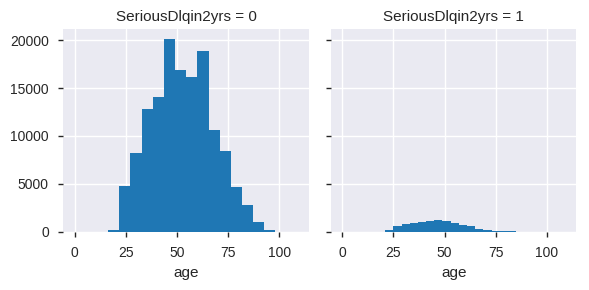

In [16]:
g = sns.FacetGrid(df, col='SeriousDlqin2yrs')
g.map(plt.hist, 'age', bins=20)

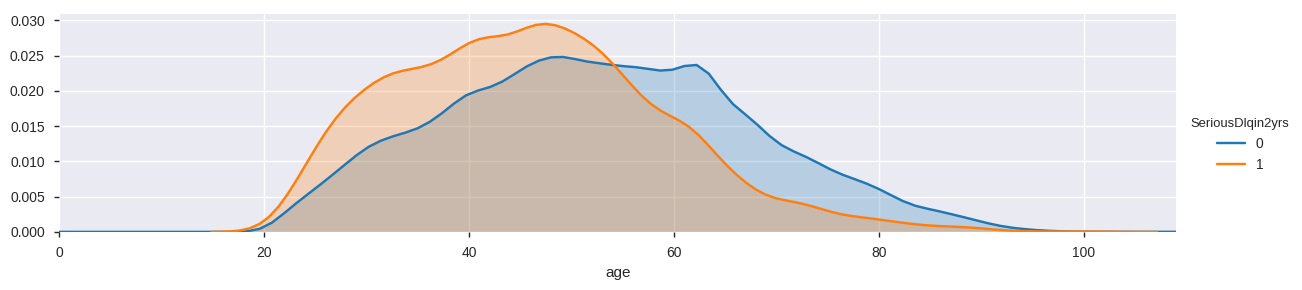

In [22]:
facet = sns.FacetGrid(df, hue="SeriousDlqin2yrs",aspect=4)
facet.map(sns.kdeplot,'age',shade= True)
facet.set(xlim=(0, df['age'].max()))
facet.add_legend()

In [10]:
df.head(5)

,id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime3059DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime6089DaysPastDueNotWorse,NumberOfDependents
0,0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


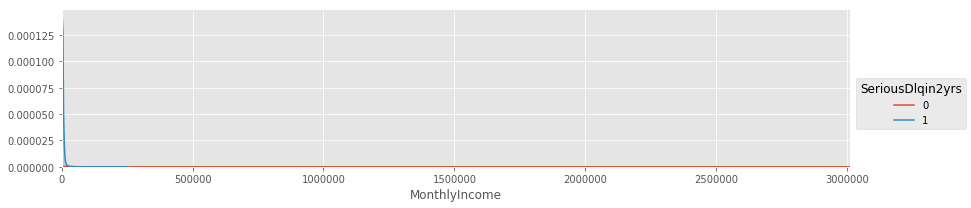

In [11]:
facet = sns.FacetGrid(df, hue="SeriousDlqin2yrs",aspect=4)
facet.map(sns.kdeplot,'MonthlyIncome',shade= True)
facet.set(xlim=(0, df['MonthlyIncome'].max()))
facet.add_legend()

In [12]:
df.columns

Index([u'id', u'SeriousDlqin2yrs', u'RevolvingUtilizationOfUnsecuredLines',
       u'age', u'NumberOfTime3059DaysPastDueNotWorse', u'DebtRatio',
       u'MonthlyIncome', u'NumberOfOpenCreditLinesAndLoans',
       u'NumberOfTimes90DaysLate', u'NumberRealEstateLoansOrLines',
       u'NumberOfTime6089DaysPastDueNotWorse', u'NumberOfDependents'],
      dtype='object')

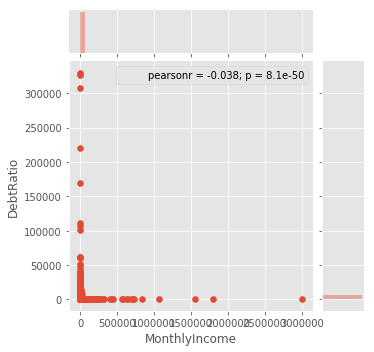

In [14]:
sns.jointplot(x="MonthlyIncome", y="DebtRatio", data=df, size=5)

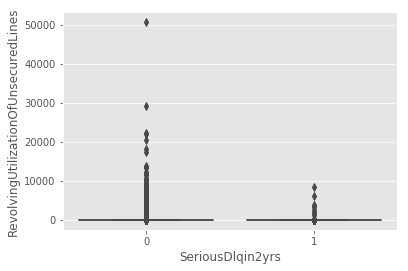

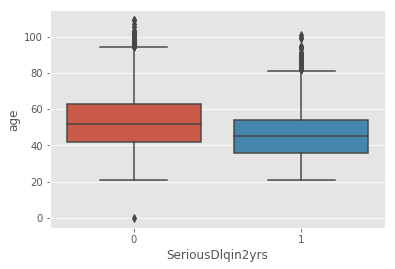

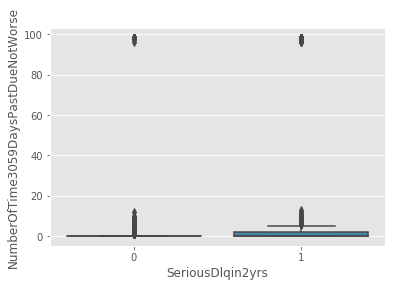

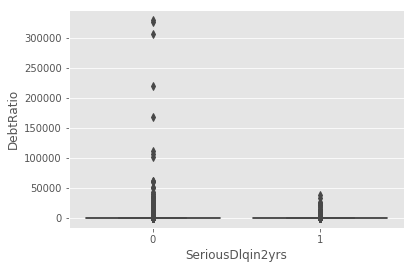

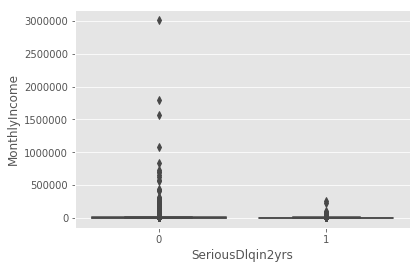

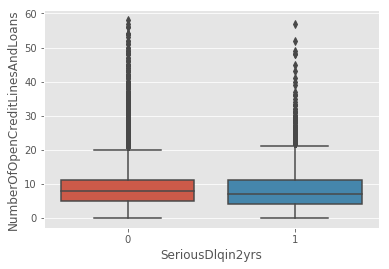

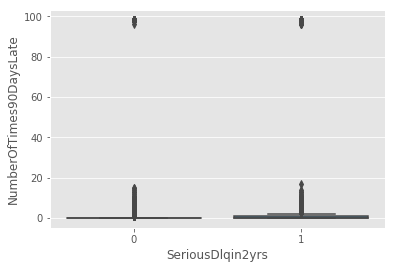

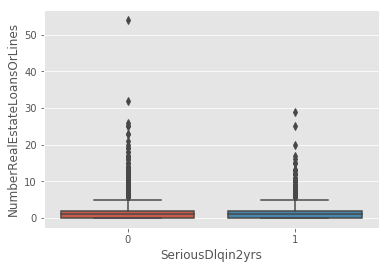

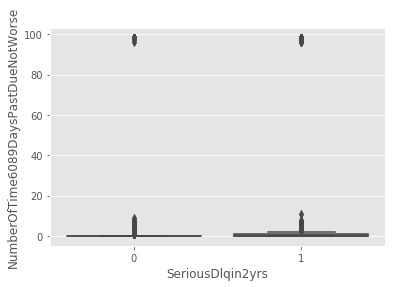

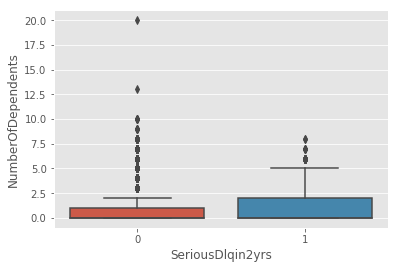

In [15]:
for f in [_ for _ in df.columns if _ not in ['id','SeriousDlqin2yrs']]:
    sns.boxplot(x="SeriousDlqin2yrs", y=f, data=df.fillna(-1))
    plt.show()

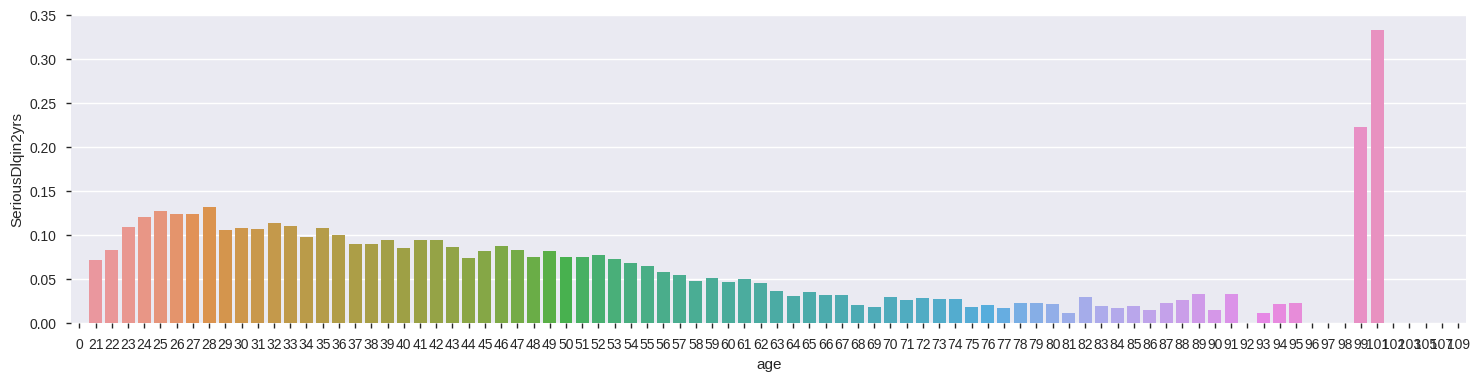

In [24]:
# average survived passengers by age
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = df[["age", "SeriousDlqin2yrs"]].groupby(['age'],as_index=False).mean()
sns.barplot(x='age', y='SeriousDlqin2yrs', data=average_age)

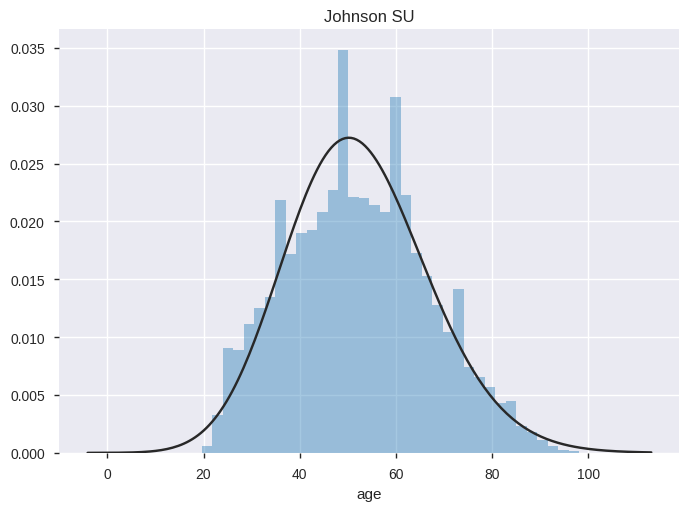

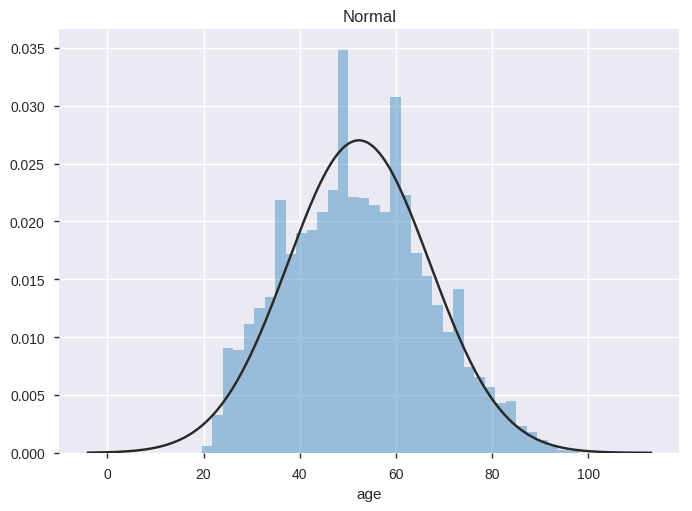

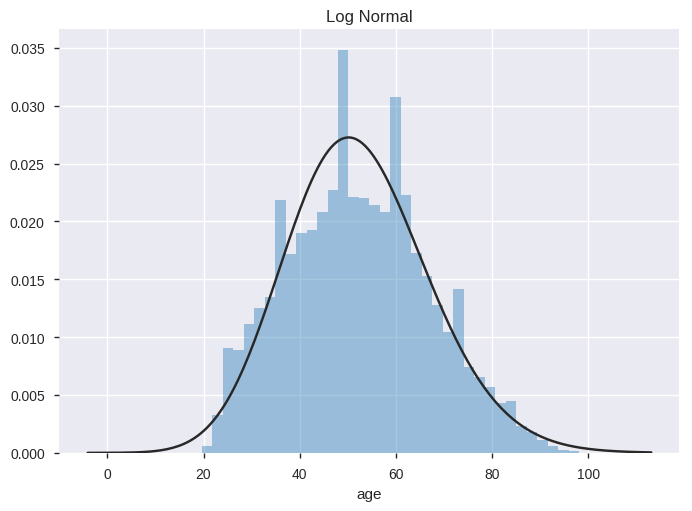

In [26]:
import scipy.stats as st
y = df['age']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

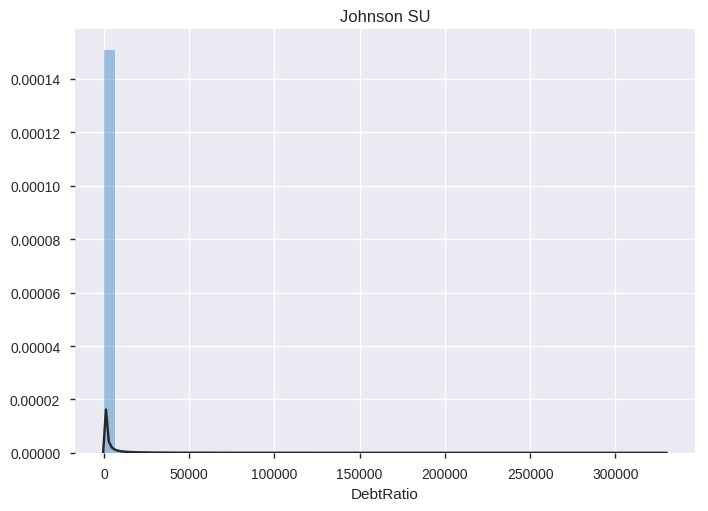

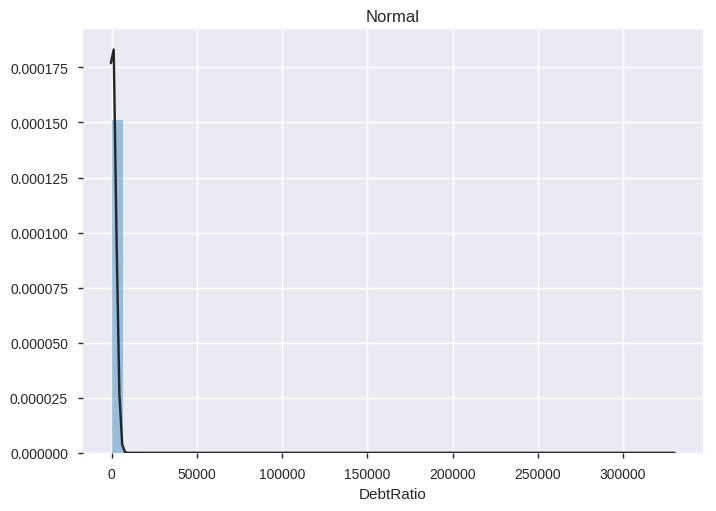

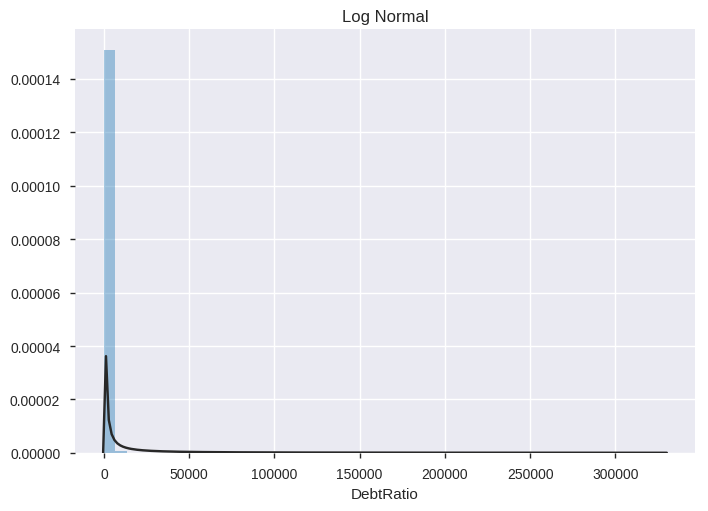

In [30]:
import scipy.stats as st
y = df['DebtRatio']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

In [10]:
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

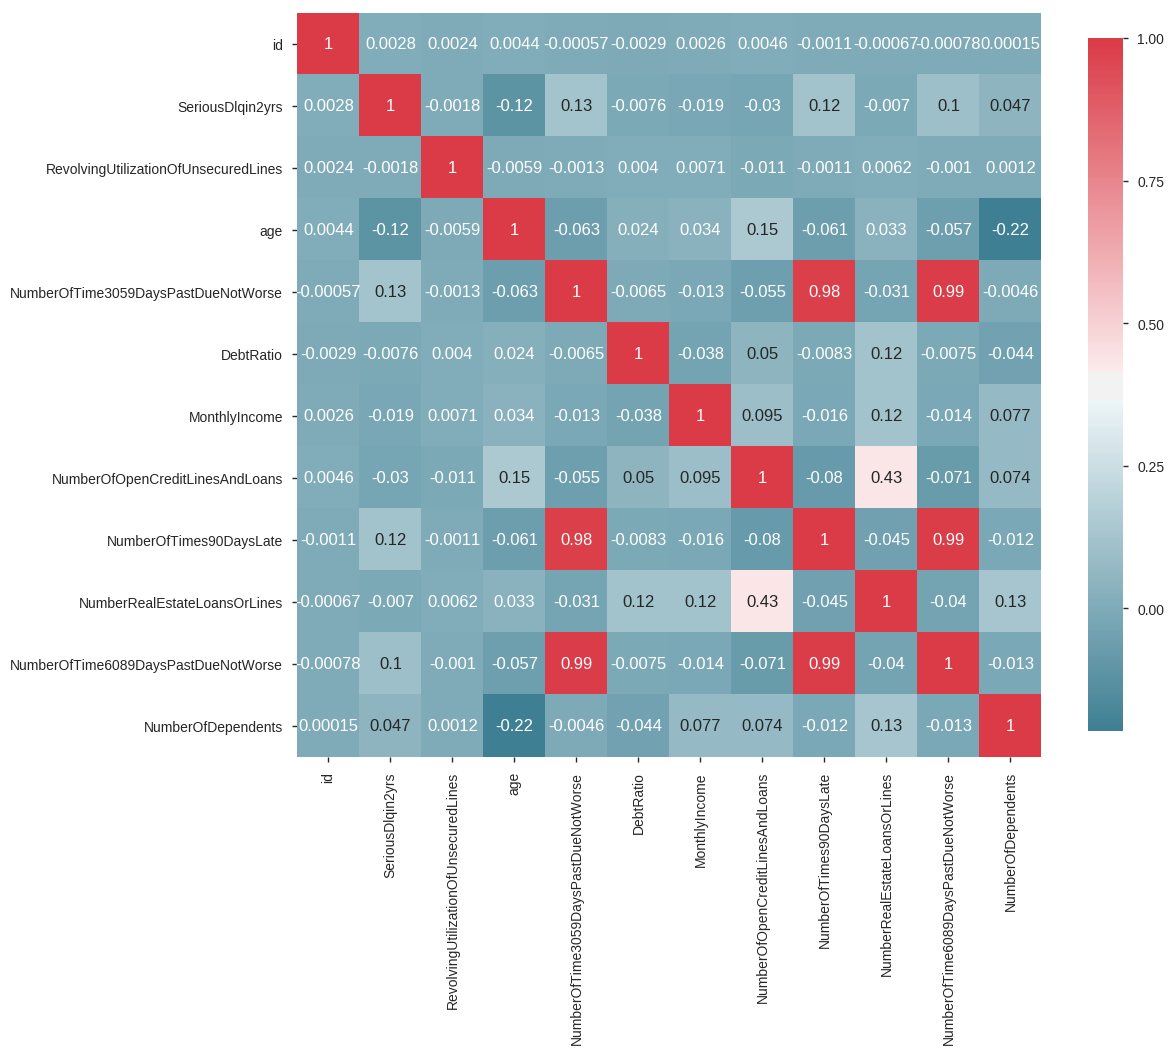

In [11]:
plot_correlation_map( df )

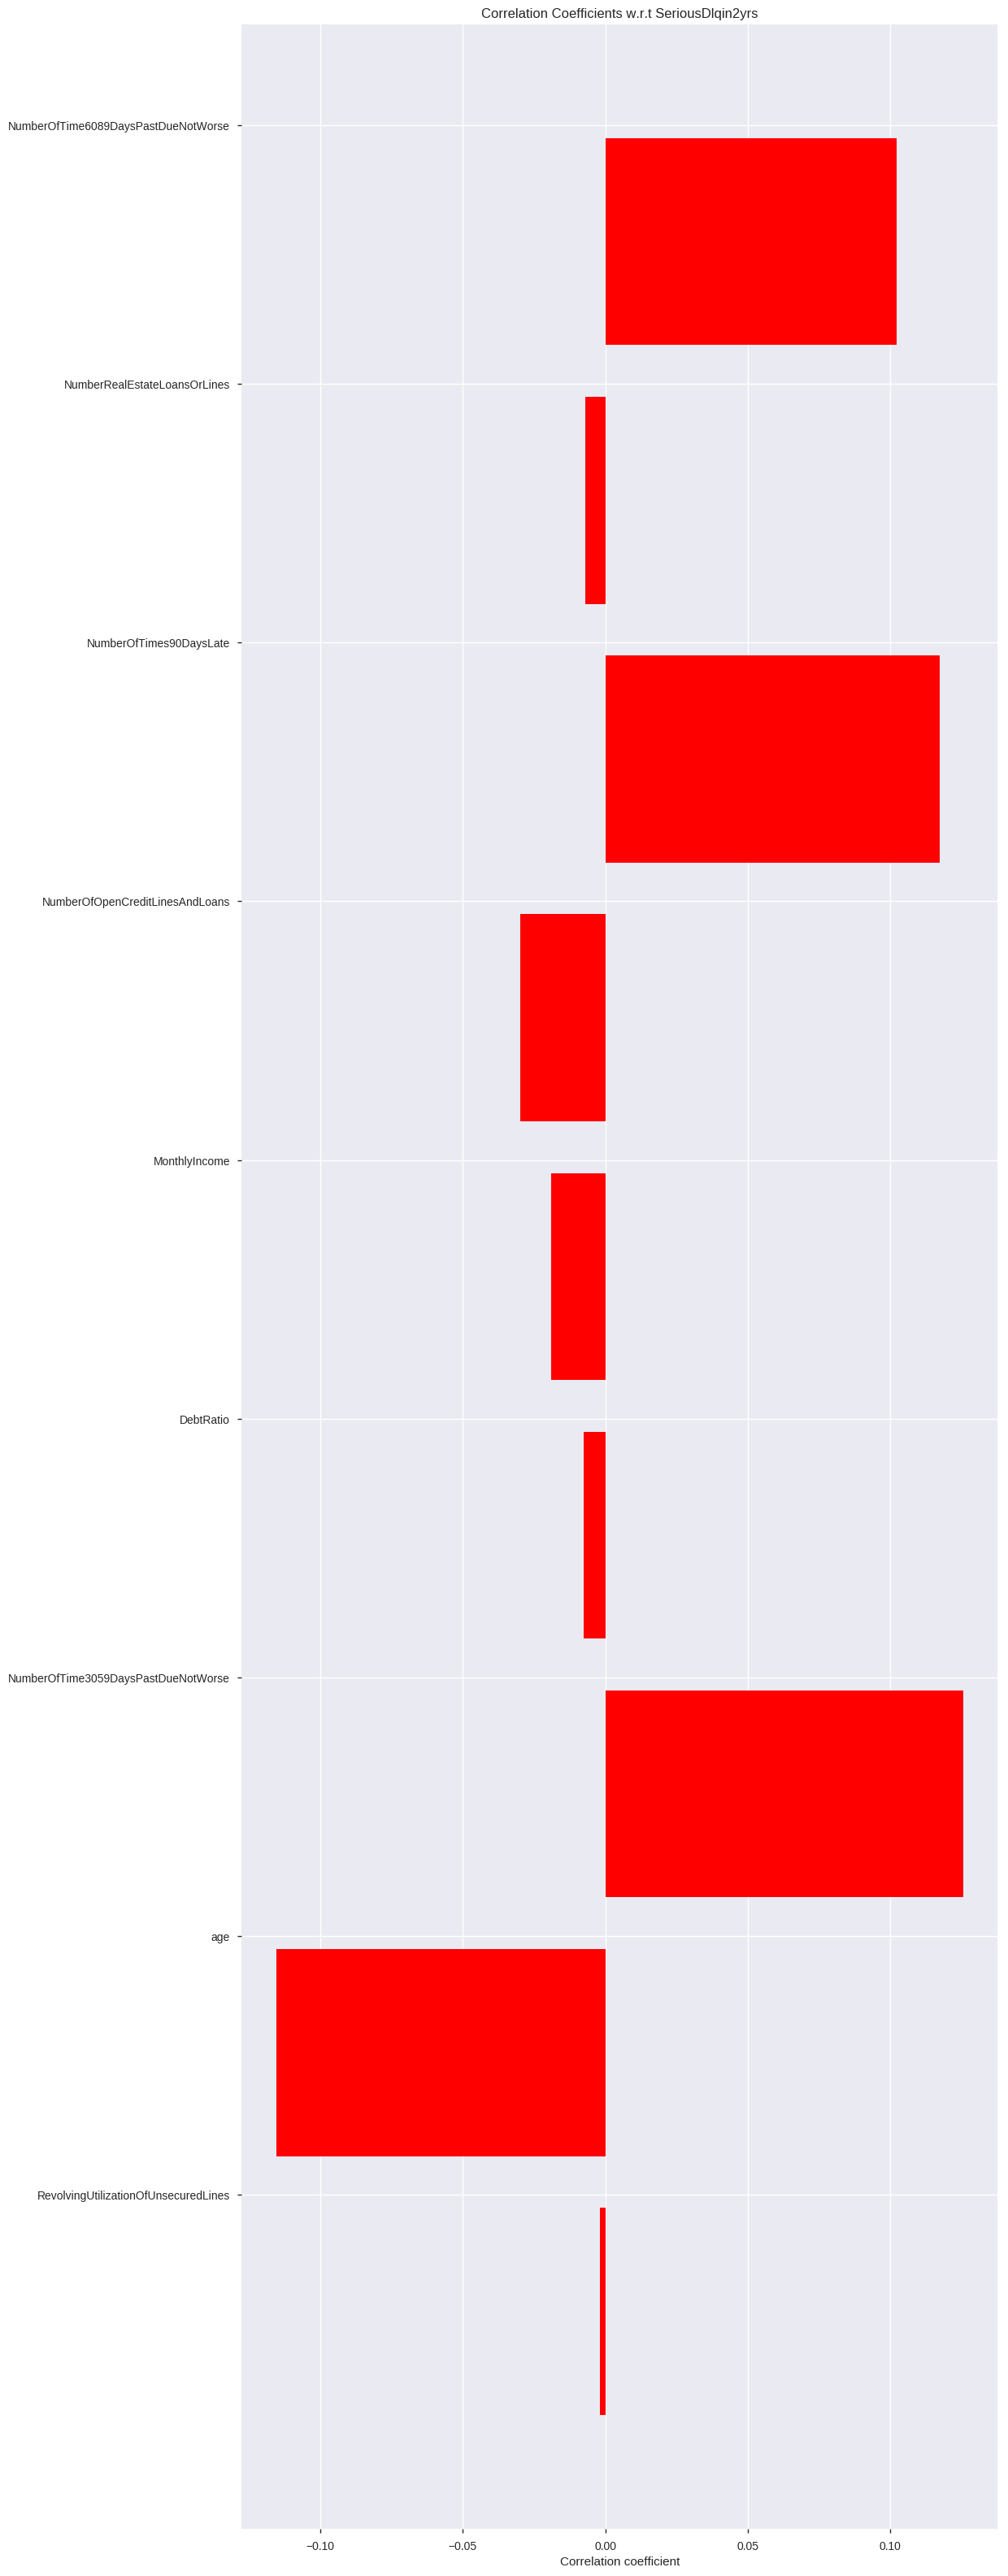

In [17]:
#plotting correlations
num_feat=df.columns[df.dtypes!=object]
num_feat=num_feat[1:-1] 
labels = []
values = []
for col in num_feat:
    labels.append(col)
    values.append(np.corrcoef(df[col].values, df.SeriousDlqin2yrs.values)[0,1])
    
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,40))
rects = ax.barh(ind, np.array(values), color='red')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation Coefficients w.r.t SeriousDlqin2yrs");

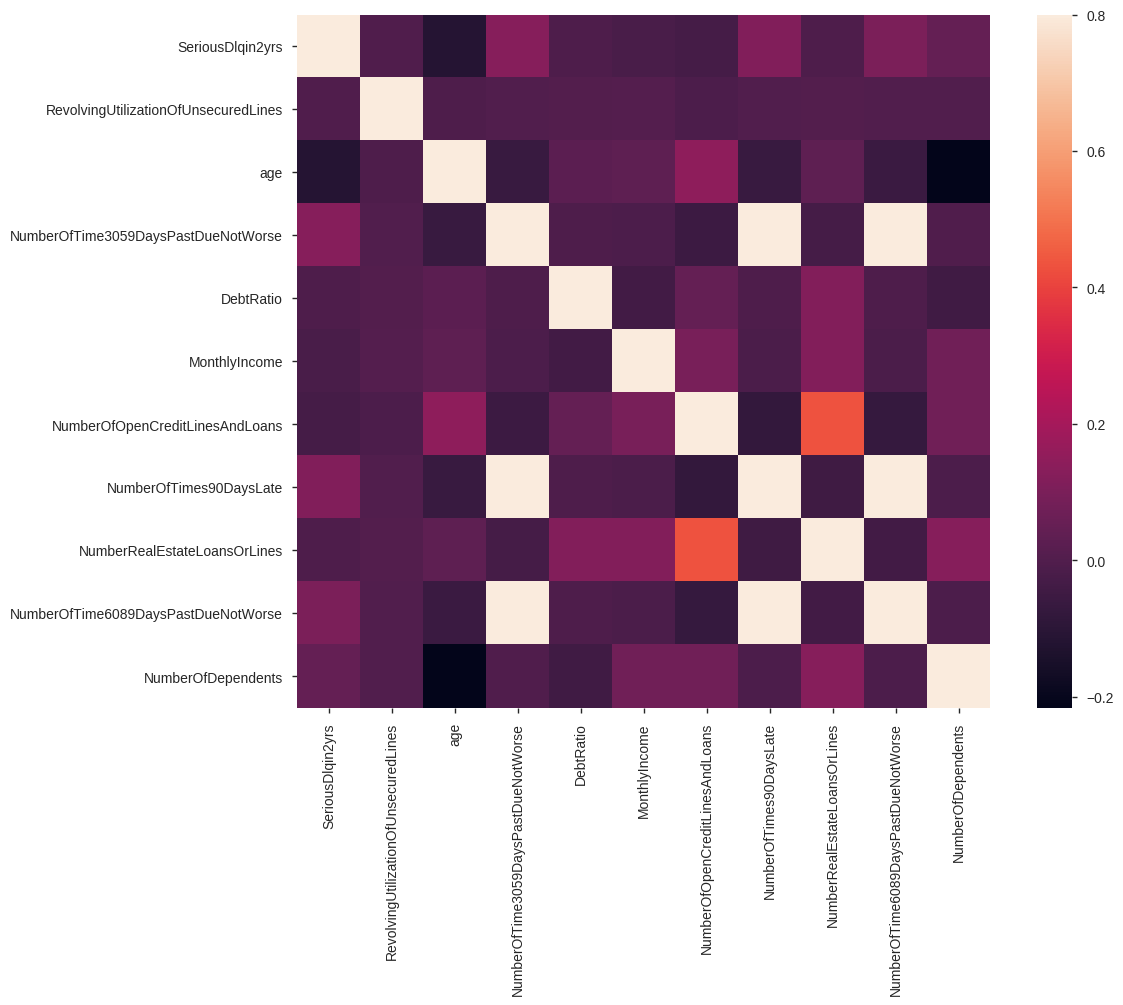

In [18]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [12]:
df.columns

Index([u'id', u'SeriousDlqin2yrs', u'RevolvingUtilizationOfUnsecuredLines',
       u'age', u'NumberOfTime3059DaysPastDueNotWorse', u'DebtRatio',
       u'MonthlyIncome', u'NumberOfOpenCreditLinesAndLoans',
       u'NumberOfTimes90DaysLate', u'NumberRealEstateLoansOrLines',
       u'NumberOfTime6089DaysPastDueNotWorse', u'NumberOfDependents'],
      dtype='object')

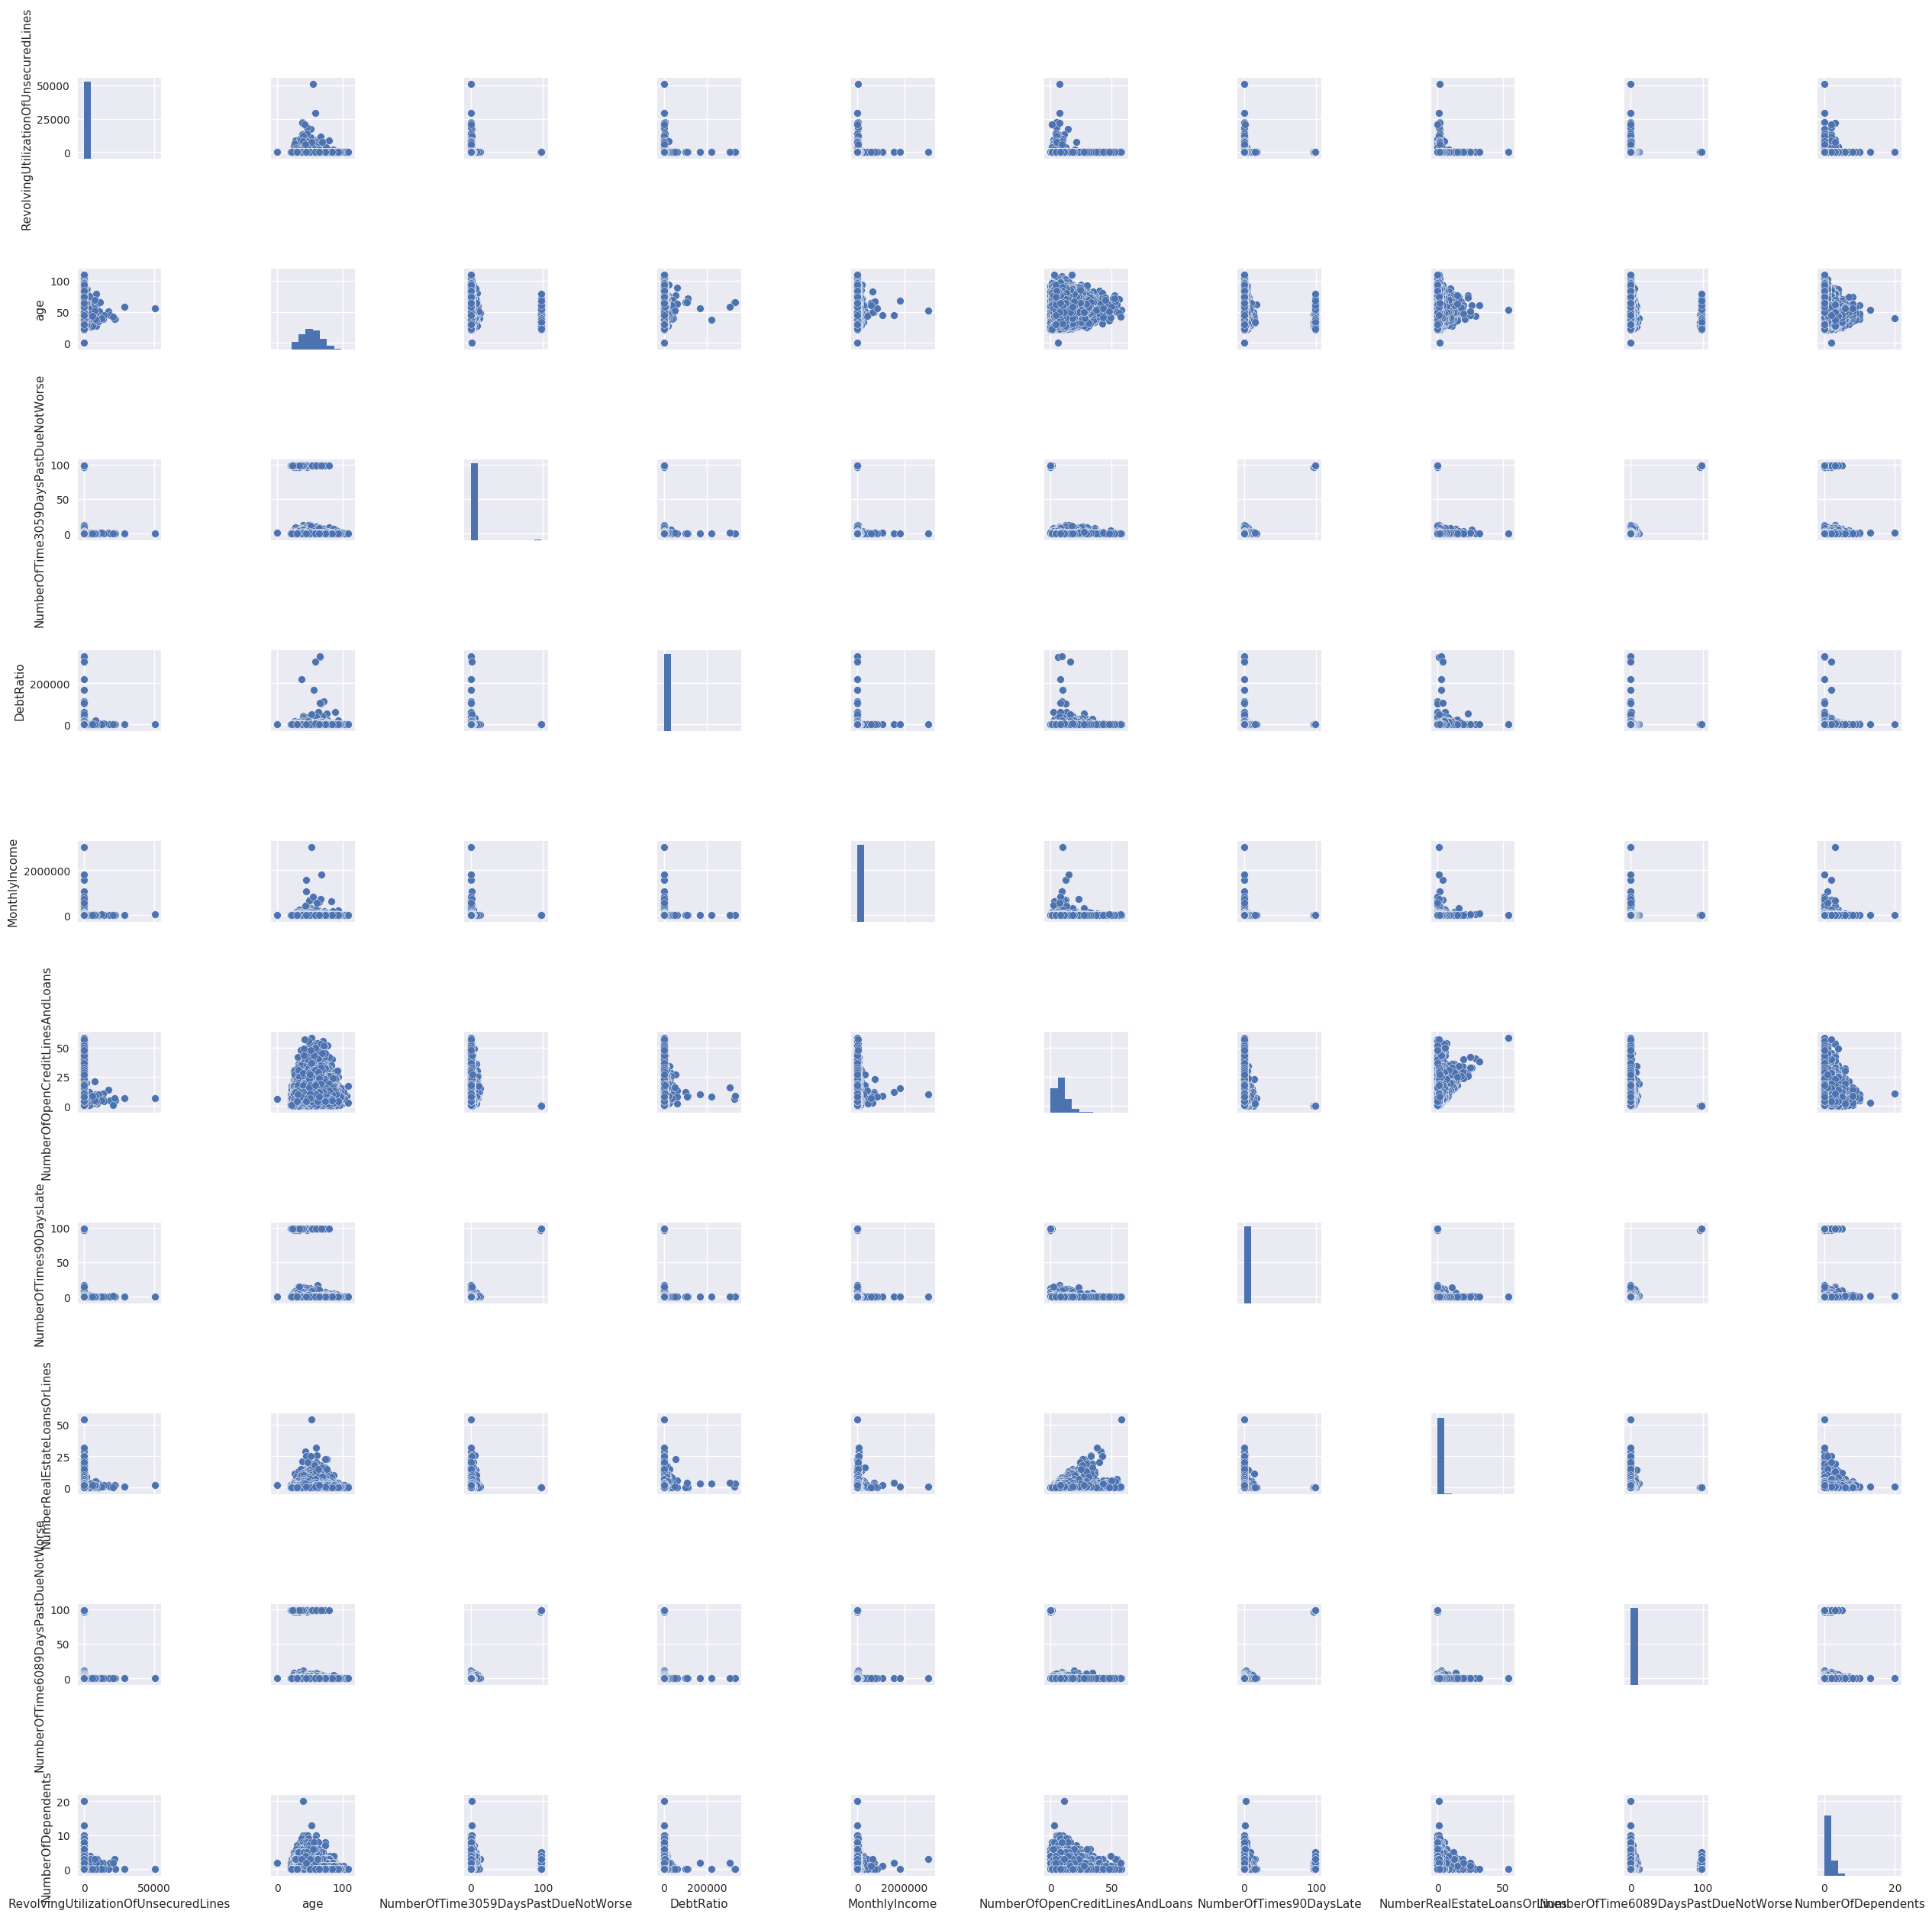

In [19]:
#scatterplot
sns.set()
cols = ['RevolvingUtilizationOfUnsecuredLines',
       'age', 'NumberOfTime3059DaysPastDueNotWorse','DebtRatio',
       'MonthlyIncome','NumberOfOpenCreditLinesAndLoans',
       'NumberOfTimes90DaysLate','NumberRealEstateLoansOrLines',
       'NumberOfTime6089DaysPastDueNotWorse','NumberOfDependents']
sns.pairplot(df[cols], size = 2.5, hue="SeriousDlqin2yrs")
plt.show();

### Violin plots

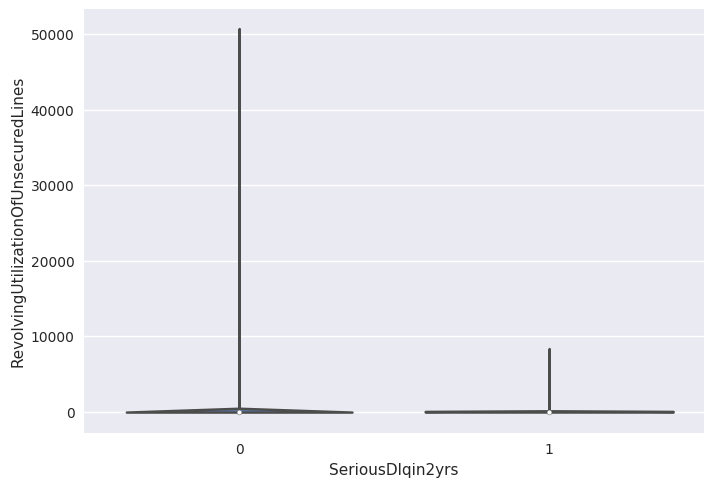

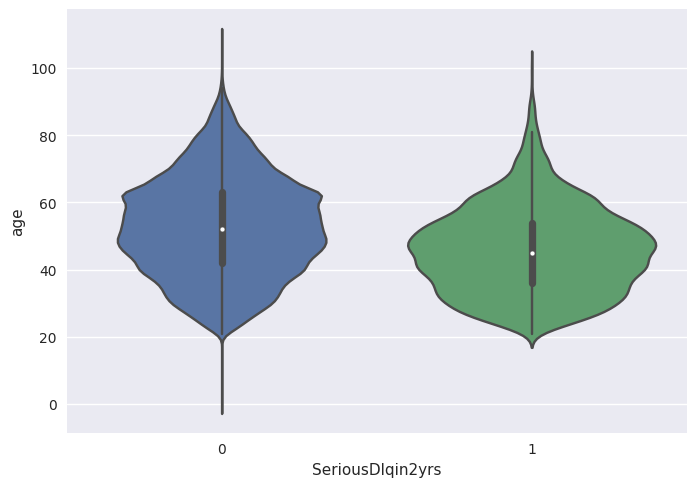

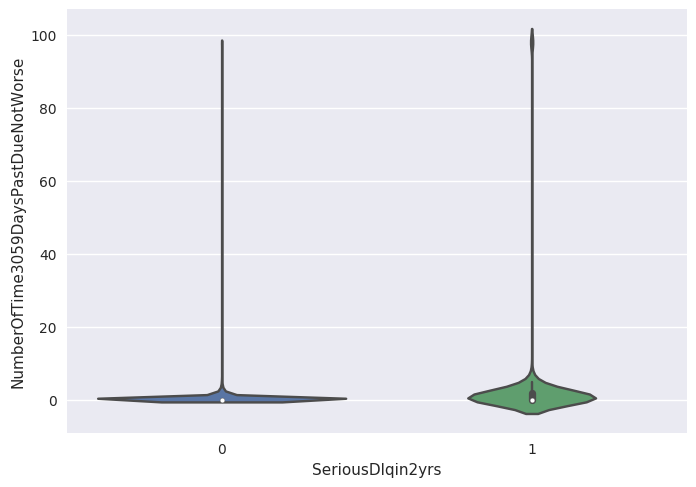

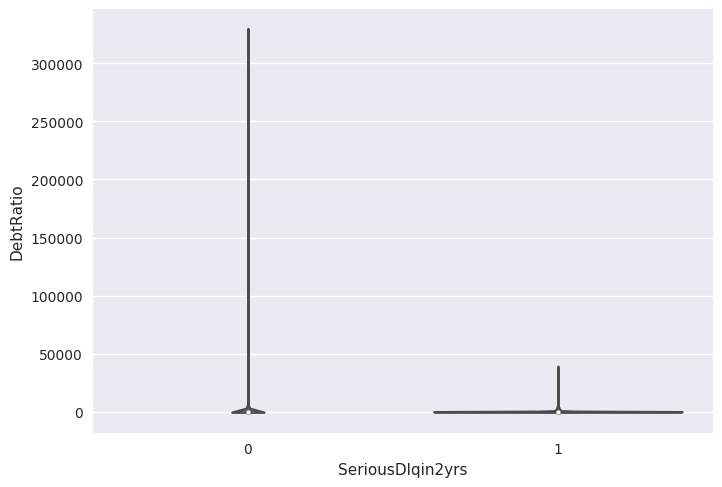

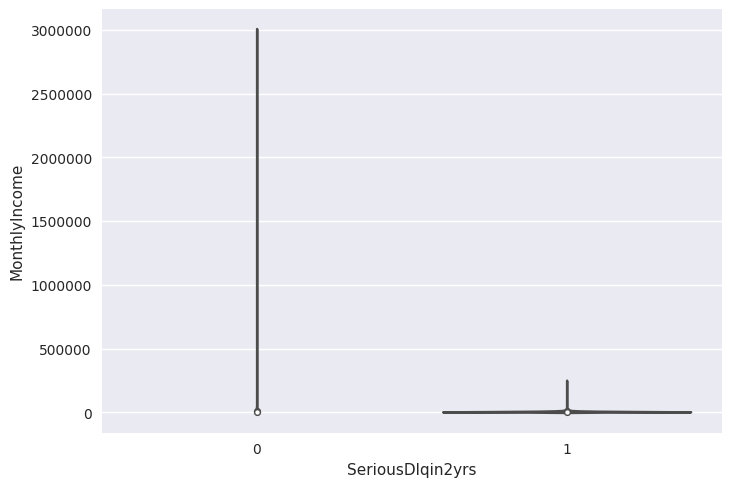

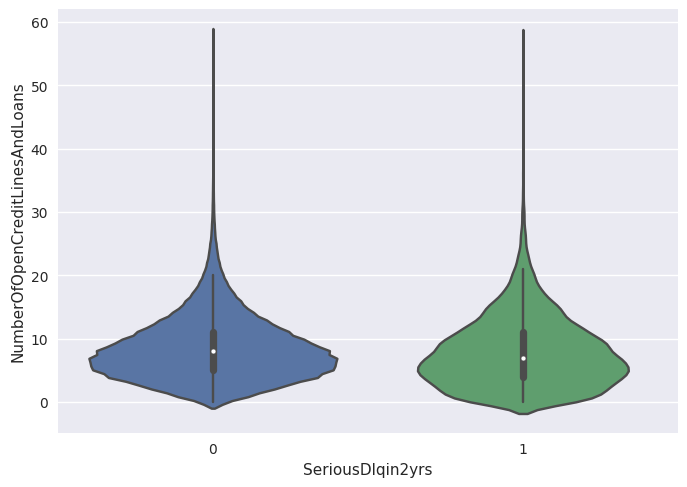

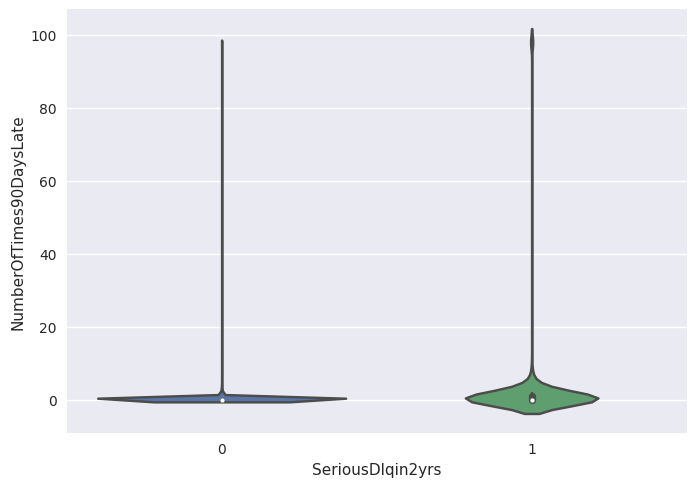

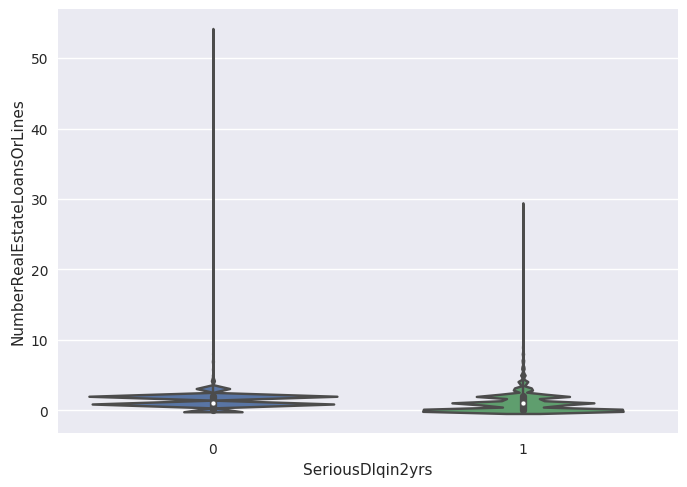

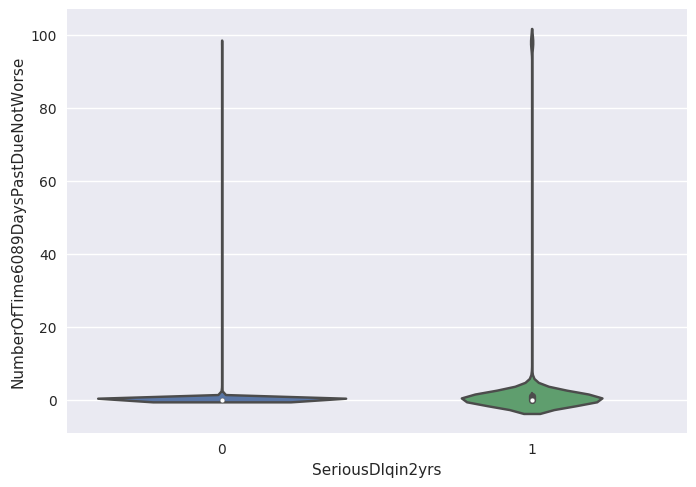

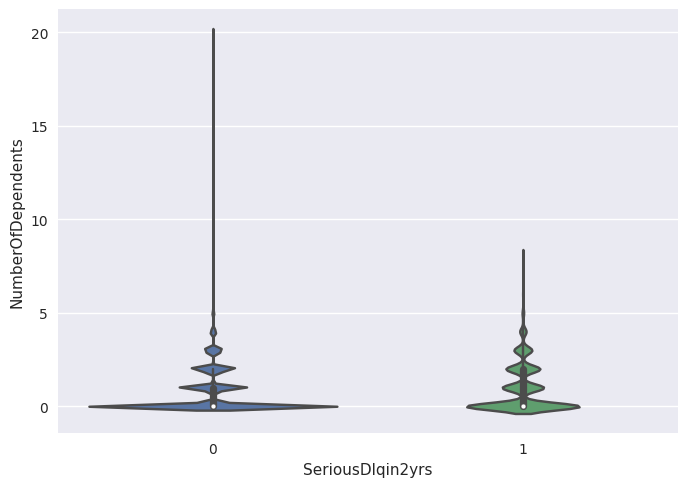

In [20]:
for f in [_ for _ in df.columns if _ not in ['id','SeriousDlqin2yrs']]:
    sns.violinplot(x="SeriousDlqin2yrs", y=f, data=df.fillna(-1))
    plt.show()

#  
#  
#  PCA/SVD (nan = -1)

### PCA

In [47]:
features_without_nan = [f for f in features if f not in features_with_nan]
                                      
pca = PCA(n_components=2)
#pca.fit()

components = pca.fit_transform(df[features_without_nan].fillna(-1))
component1 = components[:,0]
component2 = components[:,1]


In [48]:
print(pca.explained_variance_ratio_) 

[ 0.98513189  0.01479742]


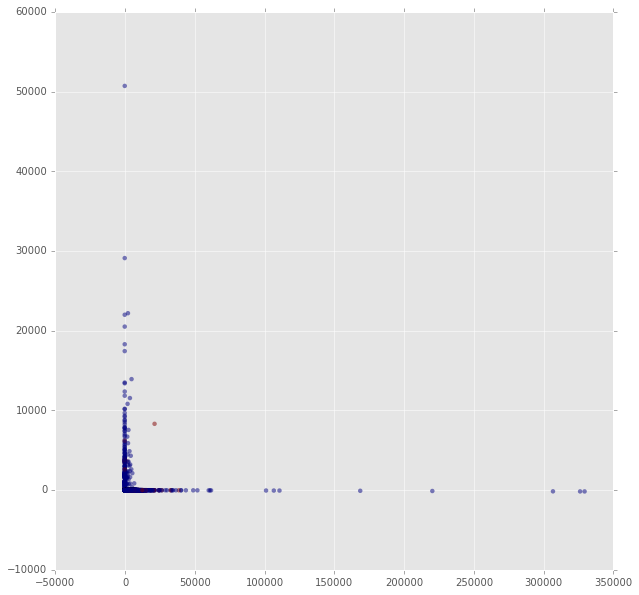

In [49]:
plt.figure(figsize=(10,10))
plt.scatter(component1,
            component2,
            c=df["SeriousDlqin2yrs"],
            edgecolor='None',
            alpha=0.5)
plt.show()

### SVD

In [50]:
svd = TruncatedSVD(n_components=2)

components = svd.fit_transform(df[features_without_nan].fillna(-1))
component1 = components[:,0]
component2 = components[:,1]

In [51]:
print(svd.explained_variance_ratio_) 

[ 0.98511284  0.0147973 ]


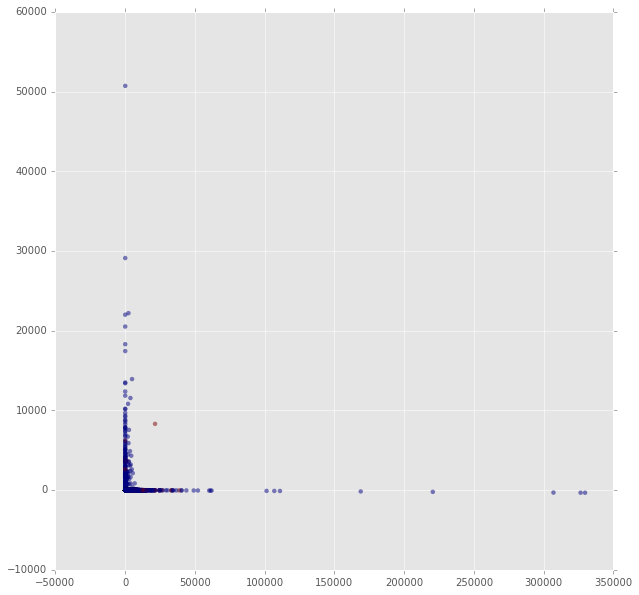

In [52]:
plt.figure(figsize=(10,10))
plt.scatter(component1,
            component2,
            c=df["SeriousDlqin2yrs"],
            edgecolor='None',
            alpha=0.5)
plt.show()

In [21]:
df.columns

Index([u'SeriousDlqin2yrs', u'RevolvingUtilizationOfUnsecuredLines', u'age',
       u'NumberOfTime3059DaysPastDueNotWorse', u'DebtRatio', u'MonthlyIncome',
       u'NumberOfOpenCreditLinesAndLoans', u'NumberOfTimes90DaysLate',
       u'NumberRealEstateLoansOrLines', u'NumberOfTime6089DaysPastDueNotWorse',
       u'NumberOfDependents'],
      dtype='object')

In [23]:
quantitative = [f for f in df.columns if df.dtypes[f] != 'object']
quantitative.remove('SeriousDlqin2yrs')

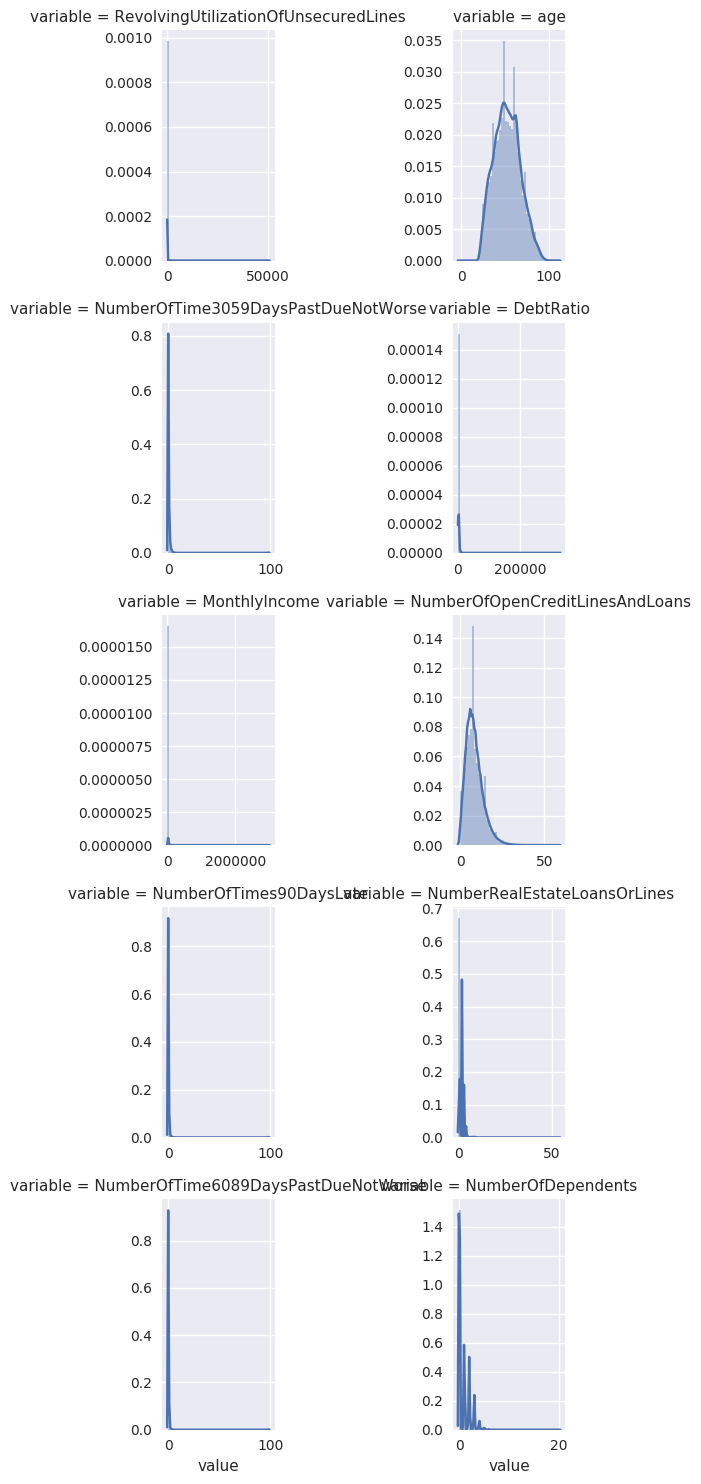

In [24]:
f = pd.melt(df, value_vars=quantitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

#  
#  
# Check distribution of train vs test data

In [9]:
df_toPredict = pd.read_csv('cs-test.csv')

In [10]:
df_toPredict.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [14]:
for c in df_toPredict.columns:
    nan_count = len(df_toPredict[df_toPredict[c].isnull()])
    if nan_count>0:
        print(c, nan_count, 1.0*nan_count/len(df))

('SeriousDlqin2yrs', 101503, 0.6766866666666667)
('MonthlyIncome', 20103, 0.13402)
('NumberOfDependents', 2626, 0.017506666666666667)


In [6]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [7]:
df_subsampled = df[0:2000]

trace = go.Scatter(
    y = df_subsampled['age'].values,
    x = df_subsampled['MonthlyIncome'].values,
    mode='markers',
    marker=dict(
        size= df_subsampled['DebtRatio'].values *0.001,
        color = df_subsampled['SeriousDlqin2yrs'].values,
        colorscale='Portland',
        showscale=True,
        opacity=0.5,
        colorbar = dict(title = 'SeriousDlqin2yrs')
    ),
    text = np.round(df_subsampled['DebtRatio'].values, decimals=2)
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Scatter plot of Monthly Income v/s Age',
    hovermode= 'closest',
        xaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False
    ),
    yaxis=dict(
        title= 'age',
        ticklen= 5,
        gridwidth= 2,
        showgrid=False,
        zeroline=False,
        showline=False,
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatterWords')
